**Titanic Passenger Survival Prediction**

**1**. **Problem** **Statement**

During the Titanic disaster, passenger survival was influenced by factors such as age, gender,
The objective of this project is to build a binary classification machine learning model to
predict whether a passenger survived (Yes/No) using historical passenger data and to identify
the most important factors affecting survival.


**2**. **Objectives** **of** **the** **Project**

· Understand passenger survival patterns

· Perform basic data preprocessing

· Conduct minimal but meaningful EDA

. Build binary classification models

· Evaluate model performance

. Identify key survival-influencing features

**3**. **Dataset** **Description**

The dataset contains the following key columns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**4**. **Exploratory** **Data** **Analysis** (**EDA**) **bold text**- **Minimal** **Graphs**


**Graph 1: Survival Count Plot**

Purpose:

Understand class distribution
Confirm binary classification nature
Graph:

Bar chart: Survived vs Not Survived

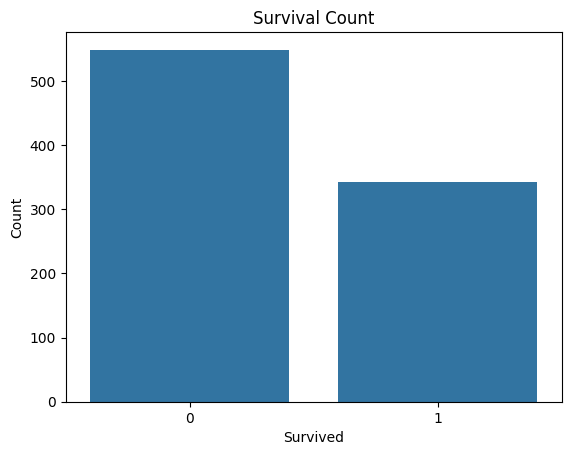

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

**Graph 2: Survival by Gende**r


Purpose:


· Analyze impact of gender on survival


Graph:


· Bar chart

· X-axis: Sex

· Hue: Survived


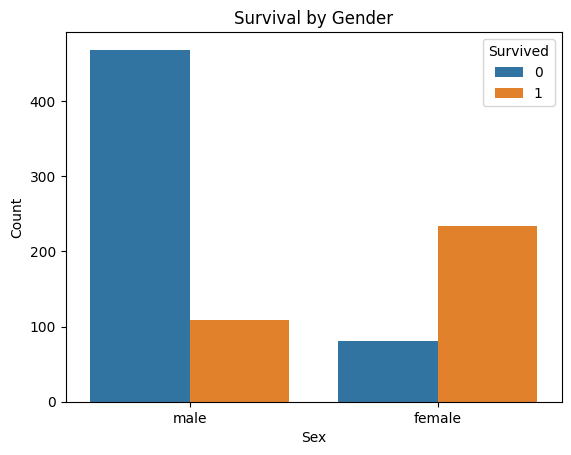

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Graph 3: Survival by Passenger Class**


Purpose:

· Understand effect of socio-economic status

Graph:

· Bar chart

· X-axis: Pclass

· Hue: Survived


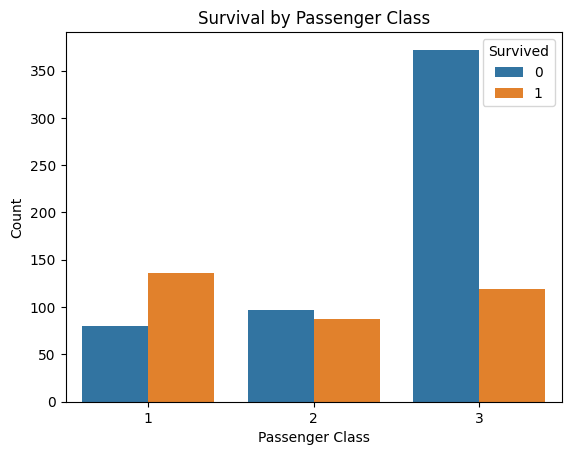

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

**Graph 4: Fare vs Survival**

Purpose:

· Analyze relationship between ticket fare and survival

Graph:

. Box plot

· X-axis: Survived

· Y-axis: Fare



Text(0.5, 1.0, 'Fare vs Survival')

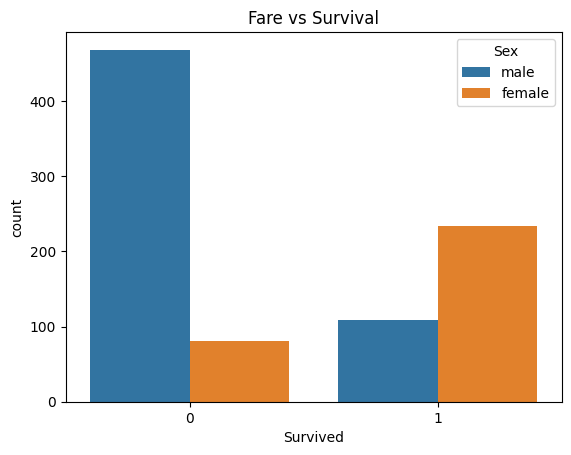

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title("Fare vs Survival")

**Machine Learning Workflow**

**Load the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 **Handle missing values (Age, Embarked)**

In [ ]:
# Numerical Column
num_cols=["Age"]

df[num_cols]=df[num_cols].fillna(df[num_cols].median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Categorical Value

cat_cols=["Embarked"]
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Drop columns with high missing values (Cabin)**




In [ ]:
df.drop('Cabin',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Encode categorical variables (Sex, Embarked)**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [ ]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


**Split data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train,X_test,y_train,y_test=train_test_split(
    X, y, random_state=42,test_size=0.2
)


** 6 Models Used**



*   Logistic Regression:baseline classifier




In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()


*  Decision Tree: Interpretable Model



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Random Forest: improved accuracy and feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)


rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# get feature importance

importance=rf.feature_importances_
featues=X.columns.tolist()

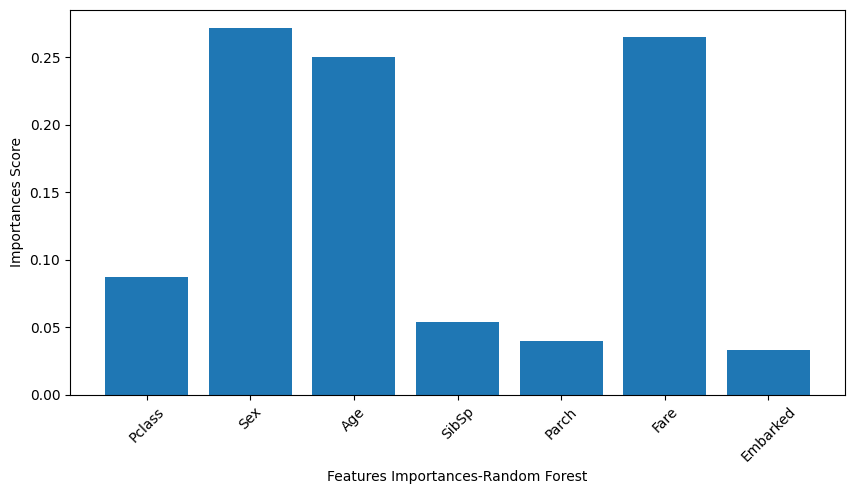

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(featues,importance)
ax.set_ylabel("Importances Score")
ax.set_xlabel("Features Importances-Random Forest")
ax.tick_params(axis='x', rotation=45)
plt.show()

**7. Model Evaluation**

Graph 5: Confusion Matrix

Purpose:

· Evaluate classification performance:

Metrics:

· Accuracy

· Precision

· Recall

· F1-Score

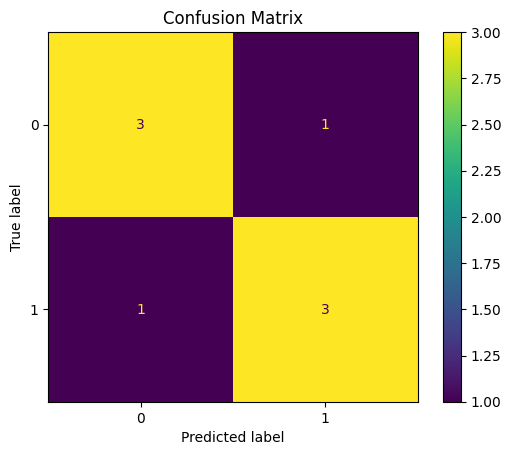

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test = [0, 1, 1, 0, 1, 0, 0, 1]      # Actual labels
y_pred = [0, 1, 0, 0, 1, 0, 1, 1]      # Predicted labels

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)

Accuracy : 0.75
Precision: 0.75
Recall   : 0.75
F1-Score : 0.75


**8. Identifying Survival-Influencing Factors**

Graph 6: Feature Importance (Random Forest)

Purpose:

. Identify most influential survival factors


Graph:

. Bar chart of feature importance

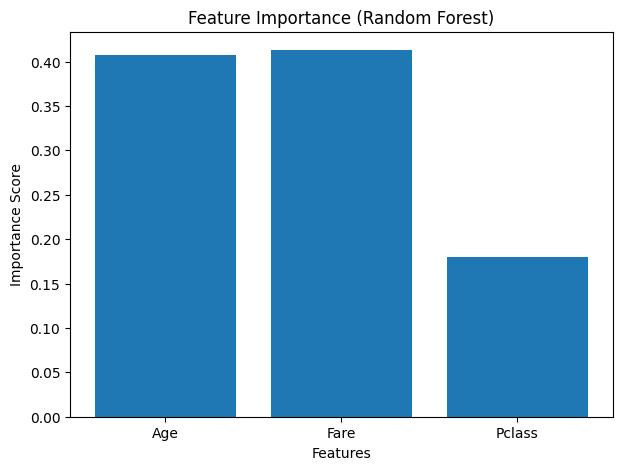

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Example Dataset (Titanic-like)
data = {
    "Age": [22, 38, 26, 35, 28],
    "Fare": [7.25, 71.83, 7.92, 53.10, 8.05],
    "Pclass": [3, 1, 3, 1, 3],
    "Survived": [0, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

# Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train Random Forest Model
model = RandomForestClassifier()
model.fit(X, y)

# Get Feature Importance
importances = model.feature_importances_

# Plot Feature Importance
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(X.columns, importances)
ax.set_title("Feature Importance (Random Forest)")
ax.set_xlabel("Features")
ax.set_ylabel("Importance Score")
plt.show()

**9**.**Expected** **Outcome**

· A trained binary classification model

· Identification of key survival-influencing factors

· Clear and interpretable visual insights

. Practical understanding of real-world classification problems

In [ ]:
df.to_csv("cleaned_dataset.csv",index=False)
from google.colab import files
files.download("cleaned_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>